# Dont Run in the Notebook whithout reading the comments some code blocks will take more that 2 hrs to complete


In [1]:
%matplotlib inline

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import random
from tqdm import tqdm_notebook as tqdm

The notebook is divided into 3 different parts consisting of the Data Loading and cleaning, training some well know classifiers and a part dedicated to the conclusions regarding the exploratory analysis that I performed on the dataset. Thank you for taking the time to read my document.


## STEP 1: Load & Clean the Data Set

The data used in this study were gathered from **188 patients with PD**
(107 men and 81 women) with ages ranging from 33 to 87 (65.1Â±10.9)
at the Department of Neurology in CerrahpaÅŸa Faculty of Medicine,
Istanbul University. The control group consists of **64 healthy
individuals (23 men and 41 women)** with ages varying between 41 and 82 (61.1Â±8.9).
During the data collection process, the microphone is set to 44.1 KHz and
following the physicianâ€™s examination, the sustained phonation of
the vowel /a/ was collected from each subject with three repetitions.


In [11]:
pd_speech_features = pd.read_csv('pd_speech_features.csv')
new_header = pd_speech_features.iloc[0] #grab the first row for the header
pd_speech_features = pd_speech_features[1:] #take the data less the header row
pd_speech_features.columns = new_header #set the header row as the df header
pd_speech_features.head()
print('The shape of the matrix is :', pd_speech_features.shape)

The shape of the matrix is : (756, 755)


#### Gather most general metadata about the data


In [12]:
pd_speech_features.info() # Gives type of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 1 to 756
Columns: 755 entries, id to class
dtypes: object(755)
memory usage: 4.4+ MB


In [13]:
pd_speech_features.describe()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756,756,756,756,756,756,756,756,756,756,...,756,756,756,756,756,756,756,756,756,756
unique,252,2,740,745,748,315,319,755,646,358,...,749,755,752,753,749,752,753,753,754,2
top,0,1,0.82273,0.72248,0.62128,237,236,0.006004477,7.17E-05,0.00076,...,1.7726,4.0251,2.8454,4.2105,2.6829,3.1144,12.595,4.2391,3.2941,1
freq,3,390,3,2,2,9,8,2,3,9,...,2,2,2,2,2,2,2,2,2,564


The describe command gives us usefull insight about how the data features are distributed (unique numbers, categories, ...) so that we can work with them in the best way. The aims is to assess whether a person has the PD disease by only looking at the speech information gathered in the .csv file. This makes sense since _"One of the most important symptoms seen in approximately 90% of the PD patients in the earlier stages of the disease is vocal problems"_.This label is given by the "class" feature in the table.


Let's first control that if we group by label we obtain the 188 PD patients and the 64 healty patients. We need to devide by 3 since three recording have been done by patient.


In [16]:
pd_speech_features = pd_speech_features.drop(['patient/healthy count'], axis = 1)

All the data was imported in the object type, we now need to take care about the types in the dataframe


In [17]:
pd_speech_features =  pd_speech_features.astype(float) #per default all floats 
pd_speech_features[['id', 'numPulses', 'numPeriodsPulses']] = pd_speech_features[['id', 'numPulses', 'numPeriodsPulses']].astype(int) #ints
pd_speech_features[['gender', 'class']] = pd_speech_features[['gender', 'class']].astype('category') #categoricals
pd_speech_features.dtypes

0
id                              int32
gender                       category
PPE                           float64
DFA                           float64
RPDE                          float64
                               ...   
tqwt_kurtosisValue_dec_33     float64
tqwt_kurtosisValue_dec_34     float64
tqwt_kurtosisValue_dec_35     float64
tqwt_kurtosisValue_dec_36     float64
class                        category
Length: 755, dtype: object

<Axes: xlabel='0', ylabel='0'>

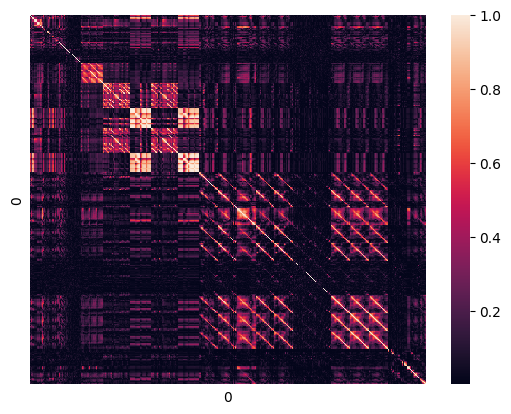

In [18]:
corr = pd_speech_features.corr() 

#too many variable to plot correlation matrix 
sns.heatmap(np.abs(corr), 
        xticklabels=[],
        yticklabels=[])

From the correlation matrix one can see that some features are strongly correlated with eachother. In order to reduce the dimentionality of the problem it could be interesting to remove one out of two strongly (positively or negatively) correlated features


## Remove some features

In the paper it is suggested to remove the TQWT features


In [19]:
pd_speech_features_no_tqwt = pd_speech_features[pd_speech_features.columns[0: -433]]
pd_speech_features_no_tqwt.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,app_LT_TKEO_std_1_coef,app_LT_TKEO_std_2_coef,app_LT_TKEO_std_3_coef,app_LT_TKEO_std_4_coef,app_LT_TKEO_std_5_coef,app_LT_TKEO_std_6_coef,app_LT_TKEO_std_7_coef,app_LT_TKEO_std_8_coef,app_LT_TKEO_std_9_coef,app_LT_TKEO_std_10_coef
1,0,1.0,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,6.2990,16.7003,42.0762,101.0889,228.8489,493.8563,1015.7707,2091.9460,4188.2456,8373.9278
2,0,1.0,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,6.2381,16.5376,41.7306,100.0918,226.9019,489.9169,1006.3702,2074.4541,4148.9889,8298.1606
3,0,1.0,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,6.2163,16.4817,41.4869,99.6154,225.7803,486.9865,1001.7348,2064.1067,4127.0967,8254.7868
4,1,0.0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,6.7833,16.8216,41.3157,94.4579,211.1565,443.3447,955.8128,1890.1299,3910.7029,7698.9389
5,1,0.0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.9366,18.3595,46.2704,108.6792,244.0607,541.2414,1057.2566,2242.5460,4297.4639,8645.2845


## Remove outliers

for one specifc column based on the interquartile interval


The data point is considered as being an outlier if it is outside of this interval: [ 0 784.0 ]


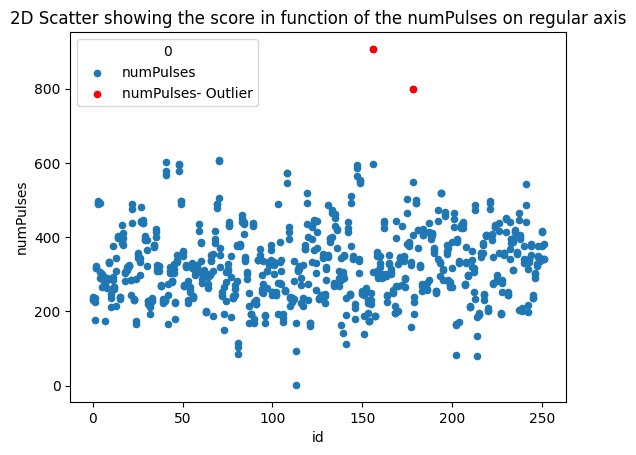

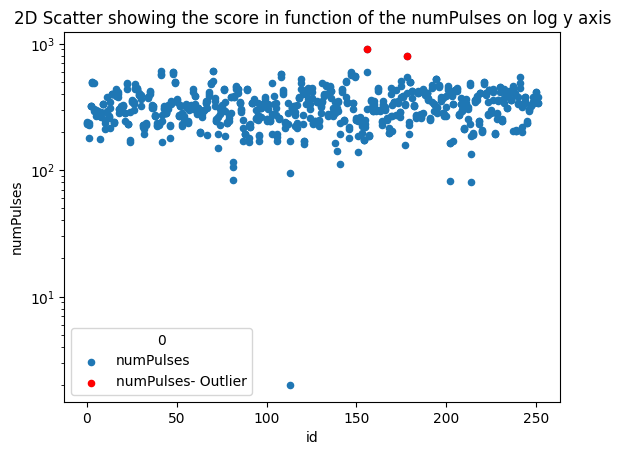

In [20]:
##Remove the outliers 
Q1 = np.percentile(pd_speech_features.numPulses, 25)
Q3 = np.percentile(pd_speech_features.numPulses, 75)
    
# Find bound
IQR = Q3 - Q1
low_outlier = max(0, Q1 - 3*IQR)
high_outlier = Q3 + 3*IQR 

print( "The data point is considered as being an outlier if it is outside of this interval: [", low_outlier , high_outlier, ']')

# Filter 
df_no_outliers = pd_speech_features[(pd_speech_features.numPulses < high_outlier) | (pd_speech_features.numPulses > low_outlier)]
df_out_outliers = pd_speech_features[(pd_speech_features.numPulses > high_outlier) | (pd_speech_features.numPulses < low_outlier)]

# Scatter plot
ax =  df_no_outliers.plot.scatter(x='id', y='numPulses', label = 'numPulses')
df_out_outliers.plot.scatter(x='id', y='numPulses', ax=ax, color='red', label = 'numPulses- Outlier')
plt.title('2D Scatter showing the score in function of the numPulses on regular axis')
plt.show()

# Scatter plot with log scale
ax =  df_no_outliers.plot.scatter(x='id', y='numPulses', label = 'numPulses', logy=True)
df_out_outliers.plot.scatter(x='id', y='numPulses', ax=ax, color='red', label = 'numPulses- Outlier', logy =True)
plt.title('2D Scatter showing the score in function of the numPulses on log y axis')
plt.show()

In [21]:
from scipy import stats
feature_np = np.array(pd_speech_features, dtype=np.float32)
pd_speech_features_no_outliers = feature_np[(np.abs(stats.zscore(feature_np)) < 3).all(axis=1)]

In [22]:
pd_speech_features_no_outliers = pd.DataFrame(data = pd_speech_features_no_outliers) 
pd_speech_features_no_outliers.columns = pd_speech_features.columns

In [23]:
# Remove the NaNs and duplicates (there were no duplicated)
pd_speech_features_no_outliers.dropna(inplace=True)
pd_speech_features_no_outliers.drop_duplicates(inplace=True)
pd_speech_features_no_outliers.shape

(78, 755)

Note: If we remove all the outlier in all the columns, one could end up with a dataset which is too small in order to predict anything.


## STEP 2: Split into training and validation set

Here it is important to consider that there have been 3 measurements done per person therefore one cannot only randomly split the matrix into traning and validation set since we would train and evaluate the model on data which is coming from the same person. Which is bad practice and would not reflect the classification power of the model.

The data will be split into 85 % training and 15% validation.

The results of each algortihm will be stored in a dictionary


In [24]:
scores_dict = {'svm' : [],'svm_less_features' : [], 'LR': [], 'LR_less_features': [], 'RF': []}

In [25]:
idx = np.arange(0, len(pd_speech_features) / 3).astype(int)
random_idx = random.sample(range(0, 251), int(len(pd_speech_features) * 0.85 / 3))

train_df = pd_speech_features[pd_speech_features.id.isin(random_idx)]
validation_df = pd_speech_features[np.logical_not(pd_speech_features.id.isin(random_idx))]

train_df_purged = pd_speech_features_no_tqwt[pd_speech_features_no_tqwt.id.isin(random_idx)]
validation_df_purged = pd_speech_features_no_tqwt[np.logical_not(pd_speech_features_no_tqwt.id.isin(random_idx))]

y_train = train_df['class']
y_train = np.array(y_train.values, dtype = 'int')
x_train = train_df.drop(['class'], axis = 1) 

y_validation = validation_df['class']
y_validation = np.array(y_validation.values, dtype = 'int')
x_validation = validation_df.drop(['class'], axis = 1) 

## 1 - Train an SVM Classifier

#### 1.a - All Features


In [26]:
from sklearn import svm 
from sklearn.model_selection import cross_val_score

clf = svm.SVC(gamma = 0.0001, C=1.0, random_state=None, tol=1e-8)
clf.fit(x_train, y_train)  # no Cross Validation

scores = cross_val_score(clf, x_train, y_train, cv=5) # with 5 fold CV
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

y_prediction = clf.predict(x_validation) 
pred_score = clf.score(x_validation, y_validation)
pred_score

Accuracy: 0.76 (+/- 0.01)


0.6842105263157895

this code trains an SVM classifier, evaluates its performance using cross-validation, and then evaluates its performance on a separate validation set. Finally, it prints the cross-validation accuracy and the accuracy on the validation set.


The cross validation does not increase the predition accuracy a lot. This shows that we are not overfitting the data.


### Compute the Confusion Matrix


In [27]:
def compute_confusion_matrix(true, pred):
    K = len(np.unique(true)) # Number of classes 
    result = np.zeros((K, K))

    for i in range(len(true)):
        result[true[i]][pred[i]] += 1

    return result

def compute_accuracy(confusion_matrix, epsilon = 1e-7):
    TP, FP, TN, FN = confusion_matrix_decomposition(confusion_matrix)
    return (TP+TN) / (TP+TN+FP+FN+epsilon) 

def compute_precision(confusion_matrix, epsilon = 1e-7):
    TP, FP, TN, FN = confusion_matrix_decomposition(confusion_matrix)
    return TP / (FP+TP+epsilon)

def compute_f1(confusion_matrix, epsilon = 1e-7):
    TP, FP, TN, FN = confusion_matrix_decomposition(confusion_matrix)
    return  (2*TP) / (2*TP+FP + FN+epsilon) 

def compute_recall(confusion_matrix, epsilon = 1e-7):
    TP, FP, TN, FN = confusion_matrix_decomposition(confusion_matrix)
    return TP / (TP + FN+epsilon)

def confusion_matrix_decomposition(confusion_matrix): 
    TP = confusion_matrix[0,0]
    FP = confusion_matrix[0,1]
    TN = confusion_matrix[1,1]
    FN = confusion_matrix[1,0]
    
    return TP, FP, TN, FN

Accuracy is the proximity of measurement results to the true value; precision, the repeatability, or reproducibility of the measurement

- precision or positive predictive value (PPV) : The precision is given by : PPV = TP / (FP+TP)
- accuracy (ACC) = (TP+TN) / (TP+TN+FP+FN)
- F1 score is the harmonic mean of precision and sensitivity = (2TP) / (2TP+FP+FN)
- sensitivity, recall, hit rate, or true positive rate (TPR) = TP / (TP + FN)


In [28]:
confusion_matrix = compute_confusion_matrix(y_validation, y_prediction.astype('int'))
print(confusion_matrix)
print('Our testing accuracy is {}'.format(pred_score))

[[ 0. 36.]
 [ 0. 78.]]
Our testing accuracy is 0.6842105263157895


In [29]:
accuracy = compute_accuracy(confusion_matrix)
precision = compute_precision(confusion_matrix)
F1 =  compute_f1(confusion_matrix)
recall = compute_recall(confusion_matrix)

print('accuracy', accuracy)
print('precision', precision)
print('F1', F1)
print('recall', recall)

scores_dict['svm'] = [accuracy,precision, F1, recall]

accuracy 0.6842105257156048
precision 0.0
F1 0.0
recall 0.0


#### 1.b - Less Features


In [30]:
clf = svm.SVC(gamma = 0.0001, C=1.0, random_state=None, tol=1e-8)
clf.fit(train_df_purged, y_train)  # no Cross Validation

scores = cross_val_score(clf, train_df_purged, y_train, cv=5) # with 5 fold CV
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

y_prediction_purged = clf.predict(validation_df_purged) 
pred_score = clf.score(validation_df_purged, y_validation)
pred_score

Accuracy: 0.76 (+/- 0.01)


0.6842105263157895

In [31]:
confusion_matrix = compute_confusion_matrix(y_validation, y_prediction.astype('int'))
print(confusion_matrix)
print('Our testing accuracy is {}'.format(pred_score))

[[ 0. 36.]
 [ 0. 78.]]
Our testing accuracy is 0.6842105263157895


In [32]:
accuracy = compute_accuracy(confusion_matrix)
precision = compute_precision(confusion_matrix)
F1 =  compute_f1(confusion_matrix)
recall = compute_recall(confusion_matrix)

print('accuracy', accuracy)
print('precision', precision)
print('F1', F1)
print('recall', recall)

scores_dict['svm_less_features'] = [accuracy,precision, F1, recall]

accuracy 0.6842105257156048
precision 0.0
F1 0.0
recall 0.0


## 2 - Train Logitics Regression

#### 2.a - All Features


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf = LogisticRegression(solver='saga', multi_class='multinomial').fit(x_train, y_train)
clf.score(x_validation, y_validation)

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.6842105263157895

In [41]:
scores = cross_val_score(clf, x_train, y_train, cv=5) # with 5 fold CV
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy: 0.76 (+/- 0.01)


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [43]:
pred_proba_df = pd.DataFrame(clf.predict_proba(x_validation)) #predict the labels

threshold_list = np.linspace(0.0001, 1, 1000)
accuracy = []
precision = []
f1_score = []
recall = []

for i in threshold_list:
    y_prediction = pred_proba_df.map(lambda x: 1 if x > i else 0)
    y_prediction.columns = ['labels0', 'label1']
    y_prediction = y_prediction['label1'].values
    test_accuracy = accuracy_score(y_validation, y_prediction)
    confusion_matrix = compute_confusion_matrix(y_validation, y_prediction)
    
    accuracy.append(compute_accuracy(confusion_matrix))
    precision.append(compute_precision(confusion_matrix))
    f1_score.append(compute_f1(confusion_matrix))
    recall.append(compute_recall(confusion_matrix))

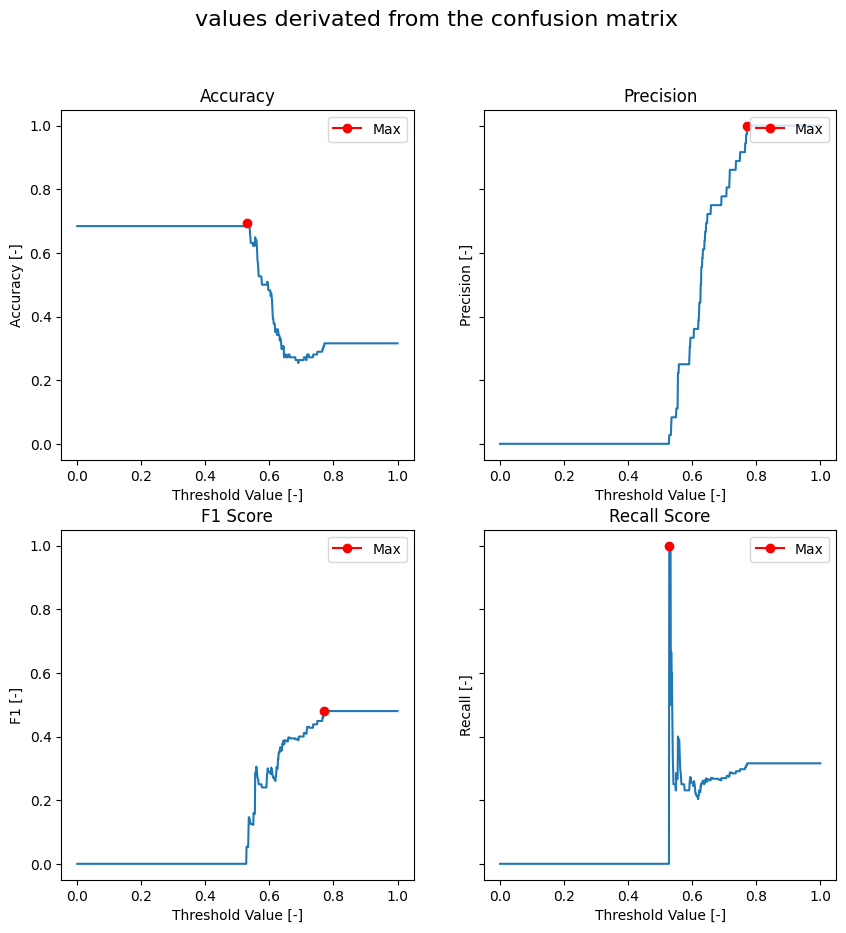

In [44]:
f, axes = plt.subplots(2, 2, sharey=True, figsize=(10,10))
    
axes[0,0].plot(threshold_list, accuracy)
axes[0,0].plot(threshold_list[np.argmax(accuracy)], np.max(accuracy), color = 'red', marker='o', label = 'Max')
axes[0,0].title.set_text('Accuracy')
axes[0,0].set_ylabel('Accuracy [-]')
axes[0,0].set_xlabel('Threshold Value [-]')
axes[0,0].legend(loc="upper right")

axes[0,1].plot(threshold_list, precision)
axes[0,1].plot(threshold_list[np.argmax(precision)], np.max(precision), color = 'red', marker='o', label = 'Max')
axes[0,1].title.set_text('Precision')
axes[0,1].set_ylabel('Precision [-]')
axes[0,1].set_xlabel('Threshold Value [-]')
axes[0,1].legend(loc="upper right")

axes[1,0].plot(threshold_list, f1_score)
axes[1,0].plot(threshold_list[np.argmax(f1_score)], np.max(f1_score), color = 'red', marker='o', label = 'Max')
axes[1,0].title.set_text('F1 Score')
axes[1,0].set_ylabel('F1 [-]')
axes[1,0].set_xlabel('Threshold Value [-]')
axes[1,0].legend(loc="upper right")

axes[1,1].plot(threshold_list, recall)
axes[1,1].plot(threshold_list[np.argmax(recall)], np.max(recall), color = 'red', marker='o', label = 'Max')
axes[1,1].title.set_text('Recall Score')
axes[1,1].set_ylabel('Recall [-]')
axes[1,1].set_xlabel('Threshold Value [-]')
axes[1,1].legend(loc="upper right")


f.suptitle("values derivated from the confusion matrix", fontsize=16)
plt.show()

scores_dict['LR'] = [np.max(accuracy),np.max(precision), np.max(F1), np.max(recall)]


**COMMENT** We can see that changing the threshold does not have a lot of impact in the training accuracy. The only value for which the prediction accuracy changes is when the threshold is set at 0.01. This means that the logistic regression here, splits the data quite clearly.


#### 2.b - Less Features


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

Accuracy: 0.76 (+/- 0.01)


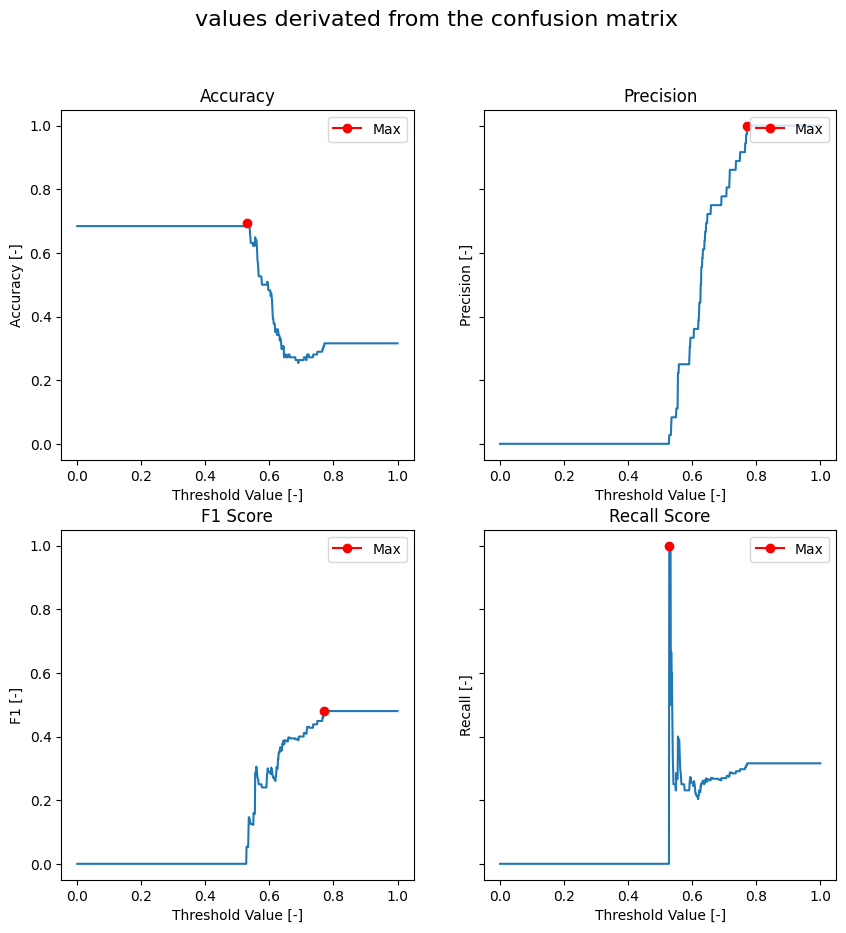

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf = LogisticRegression(solver='saga', multi_class='multinomial').fit(train_df_purged, y_train)
clf.score(validation_df_purged, y_validation)

scores = cross_val_score(clf, x_train, y_train, cv=5) # with 5 fold CV
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

pred_proba_df = pd.DataFrame(clf.predict_proba(validation_df_purged)) #predict the labels

threshold_list = np.linspace(0.0001, 1, 1000)
accuracy = []
precision = []
f1_score = []
recall = []

for i in threshold_list:
    y_prediction = pred_proba_df.map(lambda x: 1 if x > i else 0)
    y_prediction.columns = ['labels0', 'label1']
    y_prediction = y_prediction['label1'].values
    test_accuracy = accuracy_score(y_validation, y_prediction)
    confusion_matrix = compute_confusion_matrix(y_validation, y_prediction)
    
    accuracy.append(compute_accuracy(confusion_matrix))
    precision.append(compute_precision(confusion_matrix))
    f1_score.append(compute_f1(confusion_matrix))
    recall.append(compute_recall(confusion_matrix))

f, axes = plt.subplots(2, 2, sharey=True, figsize=(10,10))
    
axes[0,0].plot(threshold_list, accuracy)
axes[0,0].plot(threshold_list[np.argmax(accuracy)], np.max(accuracy), color = 'red', marker='o', label = 'Max')
axes[0,0].title.set_text('Accuracy')
axes[0,0].set_ylabel('Accuracy [-]')
axes[0,0].set_xlabel('Threshold Value [-]')
axes[0,0].legend(loc="upper right")

axes[0,1].plot(threshold_list, precision)
axes[0,1].plot(threshold_list[np.argmax(precision)], np.max(precision), color = 'red', marker='o', label = 'Max')
axes[0,1].title.set_text('Precision')
axes[0,1].set_ylabel('Precision [-]')
axes[0,1].set_xlabel('Threshold Value [-]')
axes[0,1].legend(loc="upper right")

axes[1,0].plot(threshold_list, f1_score)
axes[1,0].plot(threshold_list[np.argmax(f1_score)], np.max(f1_score), color = 'red', marker='o', label = 'Max')
axes[1,0].title.set_text('F1 Score')
axes[1,0].set_ylabel('F1 [-]')
axes[1,0].set_xlabel('Threshold Value [-]')
axes[1,0].legend(loc="upper right")

axes[1,1].plot(threshold_list, recall)
axes[1,1].plot(threshold_list[np.argmax(recall)], np.max(recall), color = 'red', marker='o', label = 'Max')
axes[1,1].title.set_text('Recall Score')
axes[1,1].set_ylabel('Recall [-]')
axes[1,1].set_xlabel('Threshold Value [-]')
axes[1,1].legend(loc="upper right")


f.suptitle("values derivated from the confusion matrix", fontsize=16)
plt.show()

scores_dict['LR_less_features'] = [np.max(accuracy),np.max(precision), np.max(F1), np.max(recall)]

Removing features from the array. Did increase the accuracy. However the std. dev. also increased. Therefore, the performance is not much better than before. For this reason, I will use the entire dataset for the next model.


## 3 - Train a random Forest classifier

#### 3.a. All features


In [48]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 20, criterion = 'entropy') 
classifier.fit(x_train, y_train) 

# predicting the test set result
y_pred_Rforest = classifier.predict(x_validation)

classifier.score(x_validation, y_validation)

0.8070175438596491

In [49]:
scores = cross_val_score(classifier, x_train, y_train, cv=5) # with 5 fold CV
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.82 (+/- 0.10)


NOTE: One could have done a 5-fold cross-validation on the training set to fine-tune the parameters of the classifier using a grid search on the number of estimators "n_estimators" and the max depth of the trees "max_depth" and then take the mean score accross the 5 CV for each pair of features.
Here we started with computing the accuracy, recall, precision and F1 score for all the different depth and number of estimator values.


In [54]:
# Dont Run this it will take 2hrs to complete 


from tqdm import tqdm
import numpy as np
from sklearn.ensemble import RandomForestClassifier

max_depth = np.arange(1, 51)
n_estimators = np.arange(1, 51)

accuracy_depth = []
precision_depth = []
f1_score_depth = []
recall_depth = []

# Dont Run this it will take 2hrs to complete

for depth in tqdm(max_depth):
    accuracy_cv = []
    precision_cv = []
    f1_score_cv = []
    recall_cv = []

    for estimator in n_estimators:
        classifier = RandomForestClassifier(criterion='entropy', max_depth=depth, n_estimators=estimator)
        classifier.fit(x_train, y_train)

        y_pred_Rforest = classifier.predict(x_validation)
        confusion_matrix = compute_confusion_matrix(y_validation, y_pred_Rforest.astype('int'))

        accuracy_cv.append(compute_accuracy(confusion_matrix))
        precision_cv.append(compute_precision(confusion_matrix))
        f1_score_cv.append(compute_f1(confusion_matrix))
        recall_cv.append(compute_recall(confusion_matrix))

        # Dont Run this it will take 2hrs to complete

    accuracy_depth.append(accuracy_cv)
    precision_depth.append(precision_cv)
    f1_score_depth.append(f1_score_cv)
    recall_depth.append(recall_cv)

    # Dont Run this it will take 2hrs to complete


































































































100%|██████████| 50/50 [21:51<00:00, 26.23s/it]


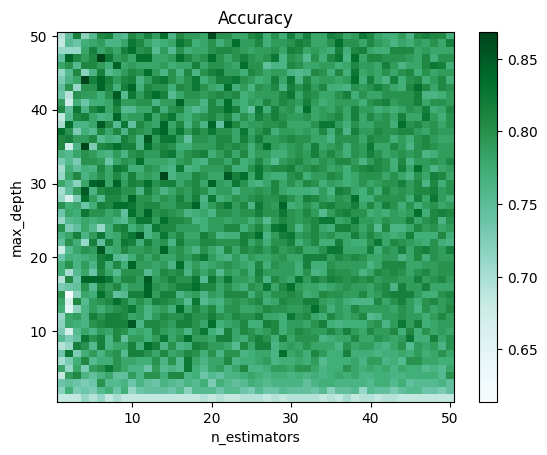

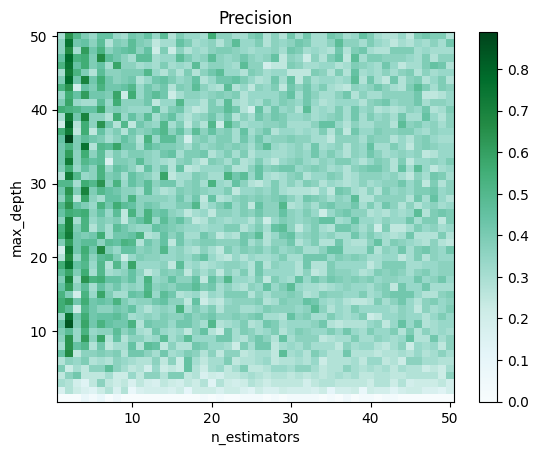

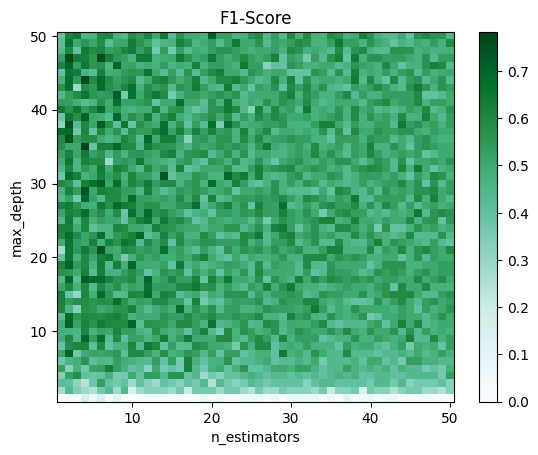

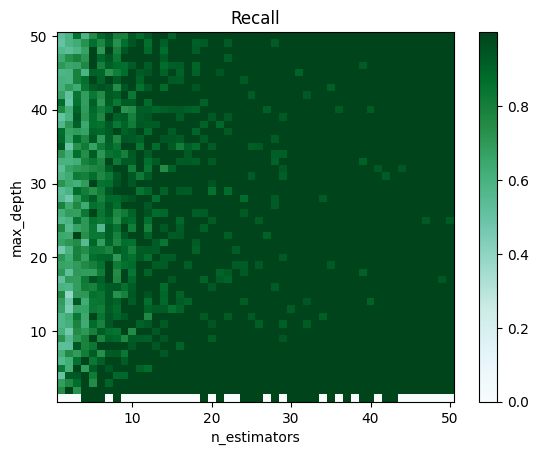

In [55]:
#plt.contour(n_estimators, max_depth, accuracy_depth, 30, linewidths = 0.5, cmap='BuGn')
plt.pcolormesh(n_estimators, max_depth, accuracy_depth, cmap = plt.get_cmap('BuGn'))
plt.colorbar()
plt.title('Accuracy')
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.show()

plt.pcolormesh(n_estimators, max_depth, precision_depth, cmap = plt.get_cmap('BuGn'))
plt.colorbar()
plt.title('Precision')
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.show()

plt.pcolormesh(n_estimators, max_depth, f1_score_depth, cmap = plt.get_cmap('BuGn'))
plt.colorbar()
plt.title('F1-Score')
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.show()

plt.pcolormesh(n_estimators, max_depth, recall_depth, cmap = plt.get_cmap('BuGn'))
plt.colorbar()
plt.title('Recall')
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.show()

**COMMENT** : We decided to focus more on the recall value than on the other factors since it is more important to have a very low number of false negatives. In these plots in 2D, the axes represented the values of a feature (either max_depth or n_estimators) that we varies and the intensity of the green is the values of accuracy, recall, f1-score and precision. Finally, we selected the features that maximized the values of the recall and we used these paramters for the other questions of the task. It is also worth to notice that the generation of these plots might take a while.


In [56]:
#Find the paramters that maximise the recall value
column = np.argmax(recall_depth)%50
row = int((np.argmax(recall_depth)-column)/50)

#  rows = depth and column = column
print('The best parameters are : max_depth = ', max_depth[row], 'and the n_estimators = ', n_estimators[column])
print('Accuracy = ', accuracy_depth[row][column])
print('Precision = ', precision_depth[row][column])
print('Recall = ', recall_depth[row][column])
print('F1 score = ', f1_score_depth[row][column])

classifier = RandomForestClassifier(n_estimators = n_estimators[column], max_depth = max_depth[row],criterion = 'entropy') 
classifier.fit(x_train, y_train) 

# predicting the test set result
y_pred_Rforest = classifier.predict(x_validation)

The best parameters are : max_depth =  31 and the n_estimators =  14
Accuracy =  0.8684210518698061
Precision =  0.583333331712963
Recall =  0.9999999952380952
F1 score =  0.7368421039704525


In [57]:
classifier.score(x_validation, y_validation)

0.8070175438596491

In [58]:
print(compute_confusion_matrix(y_validation, y_pred_Rforest.astype('int')))
print('As mentionned above the scores are : \nAccuracy = ', accuracy_depth[row][column])
print('Precision = ', precision_depth[row][column])
print('Recall = ', recall_depth[row][column])
print('F1 score = ', f1_score_depth[row][column])

[[14. 22.]
 [ 0. 78.]]
As mentionned above the scores are : 
Accuracy =  0.8684210518698061
Precision =  0.583333331712963
Recall =  0.9999999952380952
F1 score =  0.7368421039704525


In [59]:
scores_dict['RF'] = [ accuracy_depth[row][column],precision_depth[row][column], recall_depth[row][column], f1_score_depth[row][column]]

#### The most important features are given by :


In [60]:
feat_labels = train_df.columns

# Print the name and gini importance of each feature
for feature in zip(feat_labels, classifier.feature_importances_):
    print(feature)

('id', 0.0)
('gender', 0.0)
('PPE', 0.0028632266836602633)
('DFA', 0.0)
('RPDE', 0.0013718369502273512)
('numPulses', 0.0)
('numPeriodsPulses', 0.0)
('meanPeriodPulses', 0.0011215899449875009)
('stdDevPeriodPulses', 0.0)
('locPctJitter', 0.003920483606477039)
('locAbsJitter', 0.0)
('rapJitter', 0.0)
('ppq5Jitter', 0.0)
('ddpJitter', 0.0018317320732491032)
('locShimmer', 0.0)
('locDbShimmer', 0.0)
('apq3Shimmer', 0.0)
('apq5Shimmer', 0.0)
('apq11Shimmer', 0.001068926329434915)
('ddaShimmer', 0.0)
('meanAutoCorrHarmonicity', 0.0)
('meanNoiseToHarmHarmonicity', 0.0016686798270209714)
('meanHarmToNoiseHarmonicity', 0.0)
('minIntensity', 0.0019573080390480843)
('maxIntensity', 0.0)
('meanIntensity', 0.0030416052899699237)
('f1', 0.0)
('f2', 0.0)
('f3', 0.0)
('f4', 0.002695263791071728)
('b1', 0.0)
('b2', 0.0008683427360842013)
('b3', 0.0)
('b4', 0.0)
('GQ_prc5_95', 0.0)
('GQ_std_cycle_open', 0.00043538000932468644)
('GQ_std_cycle_closed', 0.0)
('GNE_mean', 0.0004927928574639846)
('GNE_std',

In [61]:
from sklearn.feature_selection import SelectFromModel
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.15
sfm = SelectFromModel(classifier, threshold=0.015)

# Train the selector
sfm.fit(x_train, y_train)

# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

std_7th_delta


In [63]:
import torch
from torch.nn.functional import normalize

x_train_tensor = torch.from_numpy(np.array(x_train, dtype=float)).float()
x_train_tensor = normalize(x_train_tensor)
x_train_norm = x_train_tensor.numpy()

x_validation_tensor = torch.from_numpy(np.array(x_validation, dtype=float)).float()
x_validation_tensor = normalize(x_validation_tensor)
x_validation_norm = x_validation_tensor.numpy()


In [64]:
#classifier = RandomForestClassifier(n_estimators = n_estimators[column], max_depth = max_depth[row],criterion = 'entropy') 
classifier = RandomForestClassifier(n_estimators = 20, criterion = 'entropy') 
classifier.fit(x_train_norm, y_train) 

# predicting the test set result
y_pred_Rforest = classifier.predict(x_validation_norm)
classifier.score(x_validation_norm, y_validation)

0.7368421052631579

In [65]:
print(compute_confusion_matrix(y_validation, y_pred_Rforest.astype('int')))

accuracy = compute_accuracy(confusion_matrix)
precision = compute_precision(confusion_matrix)
F1 =  compute_f1(confusion_matrix)
recall = compute_recall(confusion_matrix)

print('accuracy', accuracy)
print('precision', precision)
print('F1', F1)
print('recall', recall)

scores_dict['RF_norm'] = [accuracy,precision, F1, recall]

[[10. 26.]
 [ 4. 74.]]
accuracy 0.7719298238842721
precision 0.27777777700617284
F1 0.43478260775047256
recall 0.9999999900000002


## STEP 3: Conclusions


In this case, the False Negative (FN) values are the most important to focus on. A False Negative (FN) value means that the regression classified a patient as not being sick even if the person would have been was. This would have major consequences for the patient since he would not get the medication that the patient needs. The recall, accuracy and F1 score are depending on the FN values. The F1 score is the harmonic mean of the sensitivity and precision. This score penalizes a lot a model which is making mistakes on classification. However, the recall, also called, sensitivity measure seems to be the most critical regarding the False Negatives. Since we assess which measure of the error is the most critical to us, we decide to adapt the threshold for the next parts based on the threshold that gave the maximal recall value. However, considering the other score we can see that setting the threshold to the ideal one of the recall leads to very poor performance on the other scores.


In [67]:
scores_df = pd.DataFrame(data = scores_dict) 
scores_df_T = scores_df.transpose()
scores_df_T.columns = ['accuracy', 'precision', 'recall', 'F1']
scores_df_T

,accuracy,precision,recall,F1
svm,0.684211,0.000000,0.000000,0.000000
svm_less_features,0.684211,0.000000,0.000000,0.000000
LR,0.692982,1.000000,0.000000,1.000000
LR_less_features,0.692982,1.000000,0.000000,1.000000
RF,0.868421,0.583333,1.000000,0.736842
RF_norm,0.771930,0.277778,0.434783,1.000000


<Axes: >

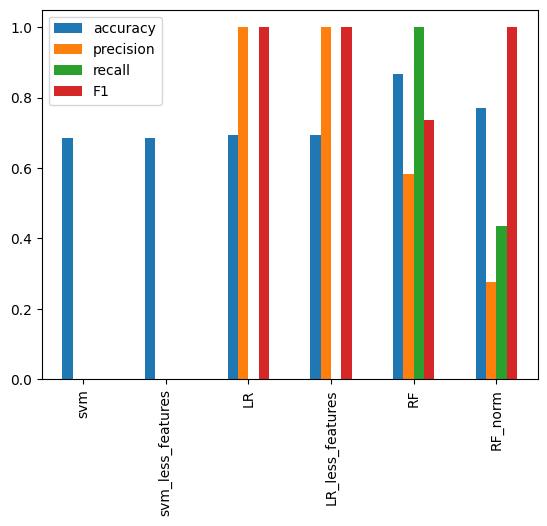

In [68]:
scores_df_T.plot(kind='bar')

While comparing the classifiers, one could see that the Grid searched Random Forest classifiers perform the best for this task. The random Forest classifier was able to reach a good accuracy and a very good recall with the parameters that minimized the number of false negatives. This is not that surprising considering that random forest classification remains the state of the art in many domains.

The performance of the Neural Network was fairly poor therefore the random forest classifier seems to be the best solution.


We have Previously tested this but it was not found accurate so we did not include it in the Report. Comparitively NN performed better so we are including it in the report


# The Training of Neural Network


In [69]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch
import torch.optim as optim

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv1d(1, 16, 5) #nn.Conv2d(nbChannels, outputChannels, kxk Square convolution)
        self.pool = nn.MaxPool1d(1, 1)
        self.conv2 = nn.Conv1d(16, 32, 3)
        self.dp = nn.Dropout(0.3)
        self.fc1 = nn.Linear(32 * 748, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, 2) #2 output channel one for the left direction and one for the rightweb

    def forward(self, x):
        print(x.shape)
        x = self.pool(F.relu(self.conv1(x)))
        x = self.dp(x)
        print(x.shape)
        x = self.pool(F.relu(self.conv2(x)))
        x = self.dp(x)
        print(x.shape)
        x = x.view(-1, 32 * 748)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

In [71]:
from tqdm.auto import tqdm
criterion = nn.CrossEntropyLoss()
#optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
optimizer = optim.Adam(net.parameters(), lr=0.001,weight_decay=5e-5) #  L2 regularization

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Normalize the Data

In ANN and other data mining approaches we need to normalize the inputs, otherwise the network will be ill-conditioned. In essence, normalization is done to have the same range of values for each of the inputs to the ANN model. This can guarantee stable convergence of weight and biases.


In [72]:
from torch.nn.functional import normalize

In [80]:
for epoch in range(50):  # loop over the dataset multiple times
    print("\nEpoch ", epoch)
    running_loss = 0.0

    x_train_tensor = torch.from_numpy(np.array(x_train, dtype=float)).float()
    x_train_tensor = normalize(x_train_tensor)
    x_train_tensor = x_train_tensor.reshape(x_train_tensor.shape[0], 1, x_train_tensor.shape[1])  # make it float and insert a fake batch dimension

    # wrap them in Variable
    inputs, labels = Variable(x_train_tensor), Variable(torch.from_numpy(y_train.astype('int')).long())  # convert to long type

    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()

    optimizer.step()

    print(outputs)
    running_loss = loss.data
    print("Running loss", running_loss)
    # Validation accuracy
    params = ["acc", "auc", "fmeasure"]



Epoch  0
torch.Size([642, 1, 754])
torch.Size([642, 16, 750])
torch.Size([642, 32, 748])
tensor([[-0.4497,  0.6659],
        [-0.4542,  0.6734],
        [-0.4627,  0.6830],
        ...,
        [-0.4684,  0.6908],
        [-0.4580,  0.6787],
        [-0.4557,  0.6755]], grad_fn=<AddmmBackward0>)
Running loss tensor(0.5547)

Epoch  1
torch.Size([642, 1, 754])
torch.Size([642, 16, 750])
torch.Size([642, 32, 748])
tensor([[-0.4551,  0.6691],
        [-0.4498,  0.6652],
        [-0.4525,  0.6690],
        ...,
        [-0.4704,  0.6926],
        [-0.4529,  0.6720],
        [-0.4497,  0.6634]], grad_fn=<AddmmBackward0>)
Running loss tensor(0.5539)

Epoch  2
torch.Size([642, 1, 754])
torch.Size([642, 16, 750])
torch.Size([642, 32, 748])
tensor([[-0.4675,  0.6912],
        [-0.4606,  0.6757],
        [-0.4586,  0.6793],
        ...,
        [-0.4568,  0.6782],
        [-0.4631,  0.6845],
        [-0.4527,  0.6716]], grad_fn=<AddmmBackward0>)
Running loss tensor(0.5547)

Epoch  3
torch.Size([

In [81]:
correct = 0
total = 0

#prediction = torch.from_numpy(normalized_input_test).float() #With normalized input 
x_validation_tensor = torch.from_numpy(np.array(x_validation, dtype = float)).float()
x_validation_tensor = normalize(x_validation_tensor)
x_validation_tensor = x_validation_tensor.reshape(x_validation_tensor.shape[0],1, x_validation_tensor.shape[1]) # make it float and insert a fake batch dimension

# wrap them in Variable
predictionVar, labelsVar = Variable(x_validation_tensor), Variable(torch.from_numpy(np.array(y_validation, dtype = 'int')))
labels = torch.from_numpy(np.array(y_validation, dtype = 'int'))

# forward + backward + optimize
#The outputs are energies for the 10 classes. Higher the energy for a class, the more the network thinks
#that the image is of the particular class. So, let’s get the index of the highest energy:
outputsPred = net(predictionVar) 

_, predicted = torch.max(outputsPred.data, 1) #predicted contains the predicted labels 
total += labels.size(0)
correct += (predicted == labels).sum()

print('Accuracy of the network on the test singals: %d %%' % (100 * correct / total))

torch.Size([114, 1, 754])
torch.Size([114, 16, 750])
torch.Size([114, 32, 748])
Accuracy of the network on the test singals: 68 %


NOTE: Considering that the loss is not changing a lot through the epoch it seems that the model is not learnign anything from the data.
